In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = 'VR_localHEMveto_lowRefitMassCut'

In [3]:
# Signal
#sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [6]:
# sig_histo / bkg_histo is a dictionary of variables
print(bkg_histo.keys())

dict_keys(['sel_e1_pt', 'sel_e1_eta', 'sel_e1_phi', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_vxy1', 'sel_e1_vz', 'sel_e2_pt', 'sel_e2_eta', 'sel_e2_phi', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_vxy1', 'sel_e2_vz', 'sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_CosThetaColl', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_mass_refit', 'sel_vtx_mass_low_refit', 'sel_vtx_pt_refit', 'sel_vtx_eta_refit', 'sel_vtx_phi_refit', 'sel_vtx_dR_refit', 'sel_vtx_mass_refit_vs_sel_vtx_mass', 'sel_vtx_mass_low_refit_vs_sel_vtx_mass_low', 'se

## Background

In [7]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
Multiboson,0.00065914,0.00000327,0.00000302,0.00000302,0.00000279,0.00000134,0.00000124,0.00000119,0.00000116,0.00000076,0.00000029
TTX,0.00136440,0.00001884,0.00001898,0.00001846,0.00001720,0.00000430,0.00000422,0.00000420,0.00000414,-0.00000054,0.00000129
QCD,0.00000248,0.00000003,0.00000001,0.00000001,0.00000001,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
DY-M50,0.00039399,0.00000385,0.00000357,0.00000354,0.00000334,0.00000170,0.00000161,0.00000161,0.00000160,0.00000103,0.00000041
ZJets,0.00242166,0.00001080,0.00001017,0.00001010,0.00000960,0.00000559,0.00000524,0.00000519,0.00000514,0.00000349,0.00000160
SingleTop,0.00023564,0.00000176,0.00000161,0.00000160,0.00000151,0.00000058,0.00000055,0.00000055,0.00000054,0.00000029,0.00000012
TTbar,0.00044365,0.00000572,0.00000531,0.00000528,0.00000505,0.00000181,0.00000170,0.00000167,0.00000166,0.00000105,0.00000041
ZGamma,0.00032470,0.00000237,0.00000253,0.00000253,0.00000233,0.00000103,0.00000086,0.00000086,0.00000086,0.00000063,0.00000020
DY-M4to50,0.00002646,0.00000030,0.00000029,0.00000029,0.00000028,0.00000015,0.00000015,0.00000015,0.00000014,0.00000007,0.00000002
WJets,0.00101329,0.00000421,0.00000396,0.00000394,0.00000370,0.00000204,0.00000193,0.00000192,0.00000190,0.00000118,0.00000047


In [8]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_localHEMveto_lowRefitMassCut/Cutflow/Efficiency//Background_Efficiency.csv


In [9]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
Multiboson,"4,593.86",22.80,21.04,21.04,19.42,9.34,8.61,8.29,8.07,5.26,2.04
TTX,423.57,5.85,5.89,5.73,5.34,1.34,1.31,1.30,1.29,-0.17,0.40
QCD,"53,319.99",631.30,286.15,285.91,271.65,67.59,67.59,67.59,66.27,0.00,0.00
DY-M50,"4,354.47",42.57,39.45,39.09,36.96,18.75,17.75,17.74,17.64,11.41,4.54
ZJets,"51,827.18",231.21,217.70,216.25,205.52,119.73,112.11,111.15,110.07,74.78,34.29
SingleTop,"3,665.01",27.37,25.03,24.93,23.47,9.10,8.48,8.48,8.40,4.54,1.80
TTbar,"22,073.23",284.84,264.35,262.86,251.43,90.21,84.56,83.33,82.83,52.09,20.16
ZGamma,"1,665.25",12.15,12.96,12.96,11.96,5.28,4.42,4.42,4.42,3.21,1.00
DY-M4to50,376.94,4.28,4.12,4.12,3.97,2.11,2.09,2.09,2.06,1.02,0.23
WJets,"177,451.75",737.90,693.88,689.77,648.19,357.34,338.37,335.77,333.29,206.19,82.30


In [10]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_localHEMveto_lowRefitMassCut/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [11]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
Multiboson,24553,139,129,129,121,63,60,59,57,36,18
TTX,141391,1805,1677,1664,1599,479,458,445,431,276,110
QCD,31603,121,117,116,110,28,28,28,25,0,0
DY-M50,272468,3053,2859,2829,2700,1104,1084,1083,1052,535,222
ZJets,729756,4200,3951,3923,3732,2142,2061,2056,2018,1164,529
SingleTop,46314,284,266,263,252,97,86,86,84,42,15
TTbar,519733,6627,6149,6113,5848,2082,1945,1913,1900,1190,463
ZGamma,6511,61,59,59,56,31,27,27,27,14,3
DY-M4to50,25923,307,287,286,271,147,146,146,141,71,26
WJets,1171204,5296,4977,4941,4667,2158,2098,2093,2029,989,432


In [12]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_localHEMveto_lowRefitMassCut/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [13]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 146.76


In [14]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['Vtx CosCollinear < 0']).transpose(), pd.DataFrame(bkg_cts_raw_df['Vtx CosCollinear < 0']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Multiboson,TTX,QCD,DY-M50,ZJets,SingleTop,TTbar,ZGamma,DY-M4to50,WJets,Total
Weighted Counts,2.04,0.40,0.00,4.54,34.29,1.80,20.16,1.00,0.23,82.30,146.76
Raw Counts,18.00,110.00,0.00,222.00,529.00,15.00,463.00,3.00,26.00,432.00,"1,818.00"


## Data

In [15]:
pd.options.display.float_format = '{:,.1f}'.format
data_cts_df = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
data_cts_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
data_2018_Data_MET_UL18_MET_Run2018D,"364,387.0","2,364.0","1,972.0","1,955.0","1,624.0",627.0,540.0,535.0,530.0,290.0,125.0
data_2018_Data_MET_UL18_MET_Run2018C,"82,311.0",529.0,457.0,456.0,387.0,143.0,119.0,119.0,116.0,67.0,40.0
data_2018_Data_MET_UL18_MET_Run2018B,"63,815.0",343.0,315.0,311.0,294.0,116.0,96.0,95.0,93.0,56.0,29.0
data_2018_Data_MET_UL18_MET_Run2018A,"124,602.0",702.0,649.0,644.0,613.0,219.0,181.0,180.0,176.0,100.0,52.0
Total,"635,115.0","3,938.0","3,393.0","3,366.0","2,918.0","1,105.0",936.0,929.0,915.0,513.0,246.0


In [16]:
pd.options.display.float_format = '{:,.1f}'.format

data_composition = pd.DataFrame(data_cts_df['Vtx CosCollinear < 0']).transpose()

data_composition = data_composition.rename(index={'Vtx CosCollinear < 0': 'Data Yield'})
data_composition = data_composition.rename(columns={'data_2018_Data_MET_UL18_MET_Run2018C': 'Run2018C', \
                                                   'data_2018_Data_MET_UL18_MET_Run2018B': 'Run2018B', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018A': 'Run2018A', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018D': 'Run2018D'
                                                   })

data_composition = data_composition.reindex(sorted(data_composition.columns), axis=1)

data_composition

,Run2018A,Run2018B,Run2018C,Run2018D,Total
Data Yield,52.0,29.0,40.0,125.0,246.0


In [17]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections                                         2.0
n(good vertex) > 0                                    2.0
HEM Jet Veto (eta upper bound bug)                    2.2
HEM Jet Veto (additionally veto missing eta region)   2.2
HEM electron Veto                                     2.0
No b-tagged jets                                      1.6
Leading jet |eta| < 2.4                               1.5
Leading jet pT > 80 GeV                               1.5
dPhi(MET,leading jet) > 1.5                           1.4
dPhi(MET,all jets) > 0.75                             1.4
Vtx CosCollinear < 0                                  1.7
Name: Total, dtype: float64

In [18]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                                         635,115.0
n(good vertex) > 0                                      3,938.0
HEM Jet Veto (eta upper bound bug)                      3,393.0
HEM Jet Veto (additionally veto missing eta region)     3,366.0
HEM electron Veto                                       2,918.0
No b-tagged jets                                        1,105.0
Leading jet |eta| < 2.4                                   936.0
Leading jet pT > 80 GeV                                   929.0
dPhi(MET,leading jet) > 1.5                               915.0
dPhi(MET,all jets) > 0.75                                 513.0
Vtx CosCollinear < 0                                      246.0
Name: Total, dtype: float64

In [19]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections                                         319,751.2
n(good vertex) > 0                                      2,000.3
HEM Jet Veto (eta upper bound bug)                      1,570.6
HEM Jet Veto (additionally veto missing eta region)     1,562.7
HEM electron Veto                                       1,477.9
No b-tagged jets                                          680.8
Leading jet |eta| < 2.4                                   645.3
Leading jet pT > 80 GeV                                   640.2
dPhi(MET,leading jet) > 1.5                               634.4
dPhi(MET,all jets) > 0.75                                 358.3
Vtx CosCollinear < 0                                      146.8
Name: Total, dtype: float64

/tmp/ipykernel_2746583/1904301384.py:17: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


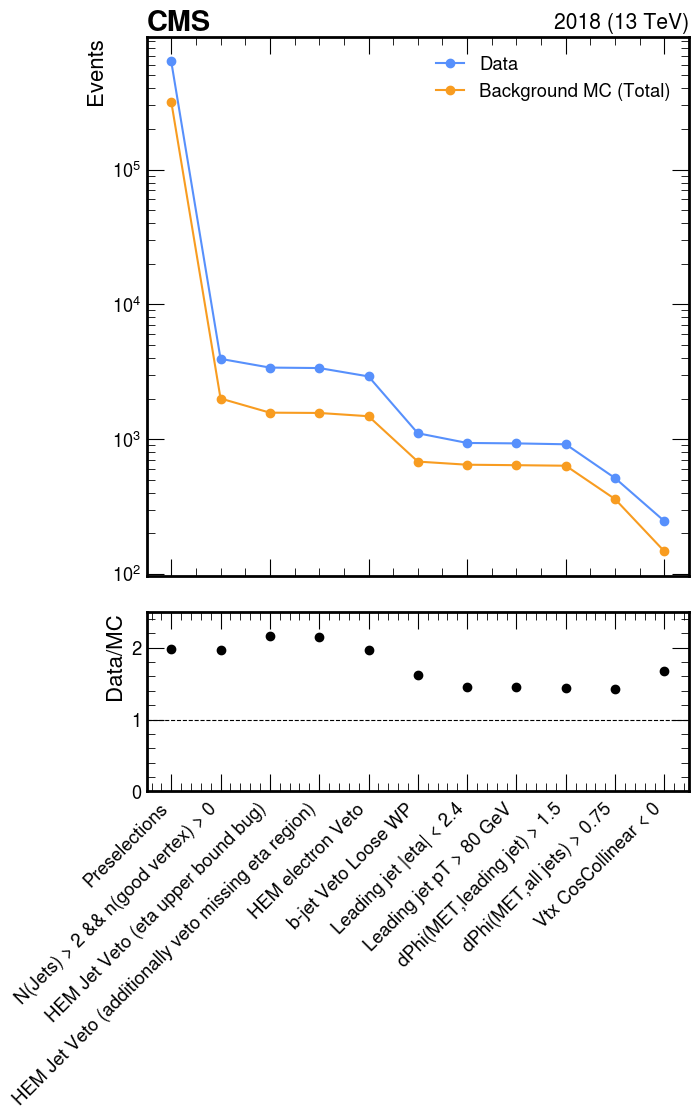

In [20]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')

plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,2.5])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'
cuts[5] = 'b-jet Veto Loose WP'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')



### Plot the efficiency

Saved: ./plots/VR_localHEMveto_lowRefitMassCut/cutflow//Cutflow_background.png


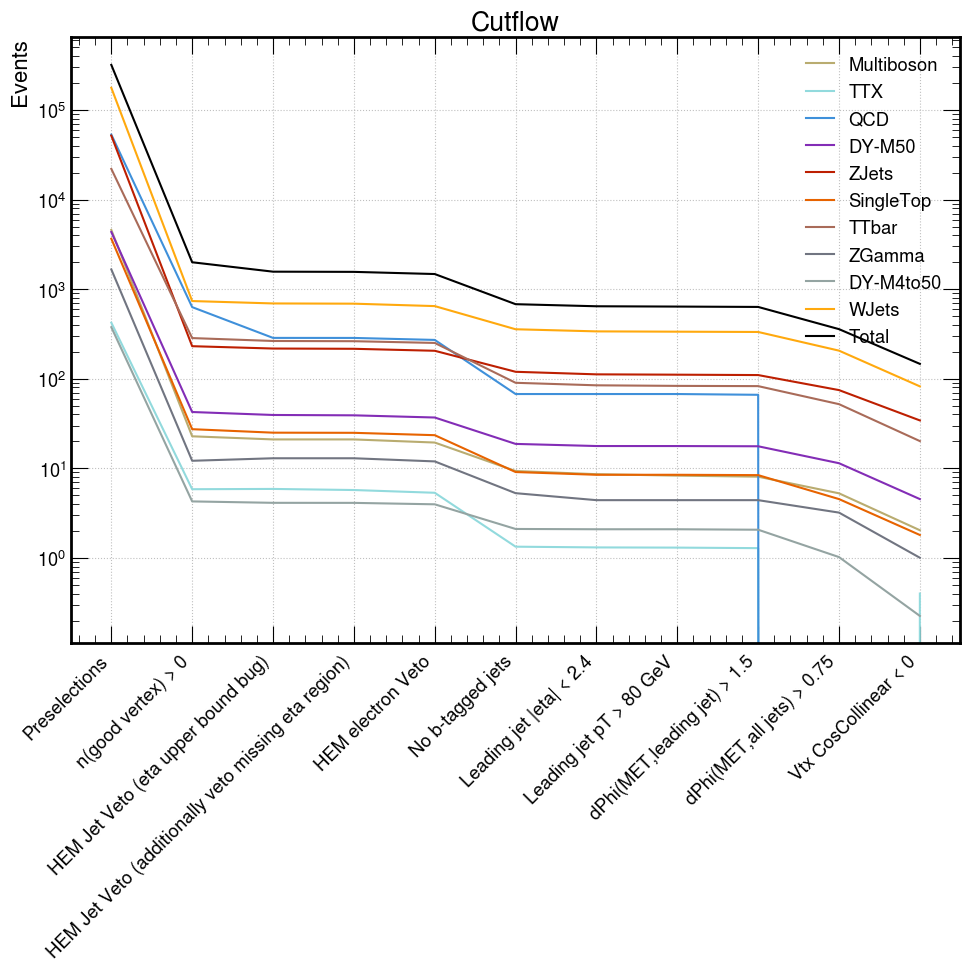

In [21]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

In [22]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                                         635,115.0
n(good vertex) > 0                                      3,938.0
HEM Jet Veto (eta upper bound bug)                      3,393.0
HEM Jet Veto (additionally veto missing eta region)     3,366.0
HEM electron Veto                                       2,918.0
No b-tagged jets                                        1,105.0
Leading jet |eta| < 2.4                                   936.0
Leading jet pT > 80 GeV                                   929.0
dPhi(MET,leading jet) > 1.5                               915.0
dPhi(MET,all jets) > 0.75                                 513.0
Vtx CosCollinear < 0                                      246.0
Name: Total, dtype: float64

In [23]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
Multiboson,"4,593.9",22.8,21.0,21.0,19.4,9.3,8.6,8.3,8.1,5.3,2.0
TTX,423.6,5.8,5.9,5.7,5.3,1.3,1.3,1.3,1.3,-0.2,0.4
QCD,"53,320.0",631.3,286.1,285.9,271.7,67.6,67.6,67.6,66.3,0.0,0.0
DY-M50,"4,354.5",42.6,39.5,39.1,37.0,18.8,17.8,17.7,17.6,11.4,4.5
ZJets,"51,827.2",231.2,217.7,216.2,205.5,119.7,112.1,111.2,110.1,74.8,34.3
SingleTop,"3,665.0",27.4,25.0,24.9,23.5,9.1,8.5,8.5,8.4,4.5,1.8
TTbar,"22,073.2",284.8,264.4,262.9,251.4,90.2,84.6,83.3,82.8,52.1,20.2
ZGamma,"1,665.3",12.2,13.0,13.0,12.0,5.3,4.4,4.4,4.4,3.2,1.0
DY-M4to50,376.9,4.3,4.1,4.1,4.0,2.1,2.1,2.1,2.1,1.0,0.2
WJets,"177,451.8",737.9,693.9,689.8,648.2,357.3,338.4,335.8,333.3,206.2,82.3


Saved: ./plots/VR_localHEMveto_lowRefitMassCut/cutflow//Cutflow_background.png


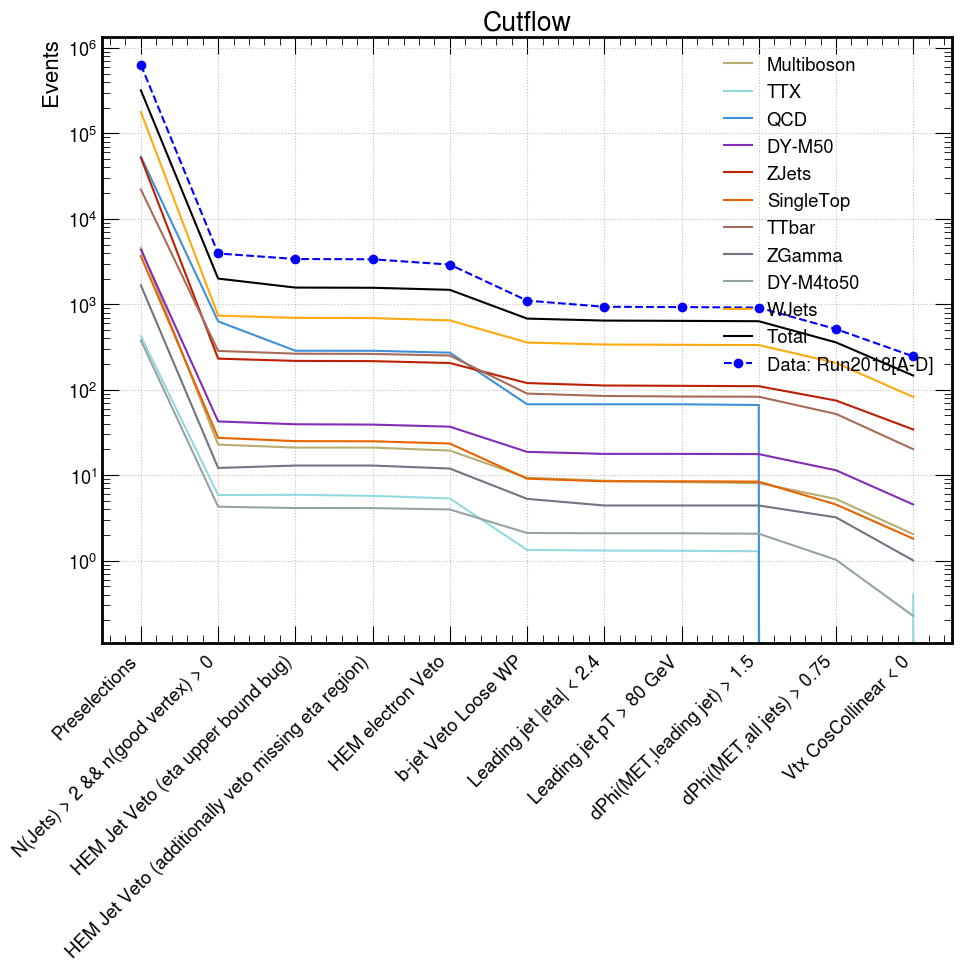

In [24]:
cmap = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"] # cms-recommended
bkg_cmap = {
    "QCD": cmap[0],
    "WJets": cmap[1],
    "ZJets": cmap[2],
    "DY-M4to50": cmap[3],
    "DY-M50": cmap[4],
    "TTbar": cmap[5],
    "SingleTop": cmap[6],
    "Multiboson": cmap[7],
    "ZGamma": cmap[8],
    "TTX": cmap[9]
}

df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
processes = df.index.values.tolist()

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'
cuts[5] = 'b-jet Veto Loose WP'

# Color map for each process
for process in processes:
    if 'Total' in process:
        plt.plot(cuts, df.loc[process], label=process, color='black')
    else:
        plt.plot(cuts, df.loc[process], label=process, color = bkg_cmap[process])

# plot data
df_data = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
plt.plot(cuts, df_data.loc['Total'], label='Data: Run2018[A-D]', color = 'blue', marker='o', linestyle='--')

if plot_dict_bkg_eff['doLog']:
    plt.yscale('log')

if plot_dict_bkg_eff['ylim'] != None:
    plt.ylim(plot_dict_bkg_eff['ylim'][0], plot_dict_bkg_eff['ylim'][1])
    
plt.grid()
    
plt.ylabel(plot_dict_bkg_eff['ylabel'])
plt.title(plot_dict_bkg_eff['title'])
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
plt.legend(loc='upper right')
    
if plot_dict_bkg_eff['doSave']:
    os.makedirs(plot_dict_bkg_eff['outDir'], exist_ok=True)
    plt.tight_layout()
    plt.savefig(f"{plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    print(f"Saved: {plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    
plt.show()